In [2]:
import sys
import os
__file__ = %pwd
sys.path.append(os.path.dirname(__file__))
from __init__ import *
print('pwd:', __file__)

HOME_LOC: /Project/Project/ADMA2024/v0.1
pwd: /Project/Project/ADMA2024/v0.1/CODE/Demo


In [3]:
trainer = Trainer(epoch=1000)
# trainer.train_and_evaluate(override=False)

/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [4]:
raise Exception("Done")

Exception: Done

In [16]:
dataset = UNIVARIATE_DATASET_NAMES[0]

In [18]:
keys = []
for k in sys.modules.keys():
    if "CODE.Attack.mix" in k:
        print(k)
        keys.append(k)
for k in keys:
    del sys.modules[k]

from CODE.Attack.mix import Mix

model_class = Mix

CODE.Attack.mix


In [19]:
model = model_class(
    dataset=dataset,
    batch_size=64,
    epoch=100,
    swap=True,
    kl_loss=False,
    CW=False,
    train_method_path=trainer.method_path,
)
model.perturb_all(
    to_device=True,
    override=True,
)
print(dataset)
model.data

ACSF1


{'ASR': 0.76,
 'mean_success_distance': 2.7458963,
 'mean_failure_distance': 9.962064,
 'overall_mean_distance': 4.4777765,
 'median_success_distance': 1.6729846,
 'median_failure_distance': 10.172532,
 'overall_median_distance': 3.107268,
 'Count_Success': 76,
 'Count_Fail': 24,
 'duration': 6.110775947570801}

In [33]:
model = model_class(
    dataset=dataset,
    batch_size=64,
    epoch=100,
    swap=True,
    kl_loss=False,
    CW=True,
    train_method_path=trainer.method_path,
)
model.perturb_all(
    to_device=True,
    override=True,
)
print(dataset)
model.data

ACSF1


{'ASR': 0.76,
 'mean_success_distance': 1.989035,
 'mean_failure_distance': 9.959241,
 'overall_mean_distance': 3.9018848,
 'median_success_distance': 0.8534922,
 'median_failure_distance': 10.165491,
 'overall_median_distance': 1.8933313,
 'Count_Success': 76,
 'Count_Fail': 24,
 'duration': 12.717828035354614}

In [69]:
keys = []
for k in sys.modules.keys():
    if "CODE.Attack.fft" in k:
        print(k)
        keys.append(k)
for k in keys:
    del sys.modules[k]

from CODE.Attack.fft import FFT

model_class = FFT

CODE.Attack.fft


Weights not initialized. Attempting to generate weights for visualization.
This is only a demo.


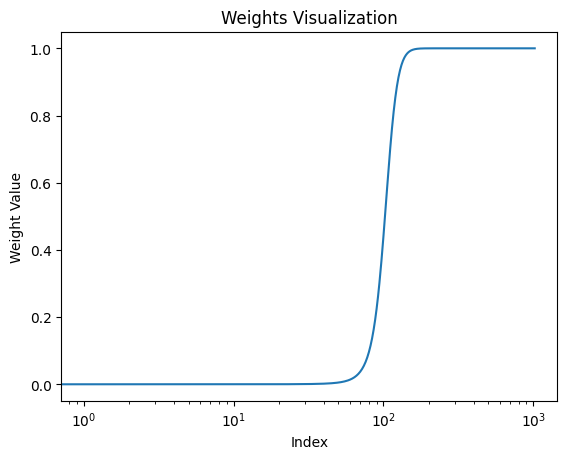

In [70]:
from CODE.Attack.fft import wfc_S

corr_parameter = {
    "weight_fun": wfc_S,
    "para": {"steepness": 0.1, "midpoint": 0.1},
}
wfc_S(**corr_parameter["para"]).visualize()

In [74]:
model = model_class(
    dataset=dataset,
    batch_size=64,
    epoch=100,
    # CW=True,
    c1=1e1,
    train_method_path=trainer.method_path,
    corr_parameter=corr_parameter,
)
model.perturb_all(
    to_device=True,
    override=True,
)
model.data

{'ASR': 0.76,
 'mean_success_distance': 2.0162177,
 'mean_failure_distance': 10.096664,
 'overall_mean_distance': 3.9555242,
 'median_success_distance': 0.85869277,
 'median_failure_distance': 10.329974,
 'overall_median_distance': 1.8989707,
 'Count_Success': 76,
 'Count_Fail': 24,
 'duration': 7.431578159332275}

In [ ]:
# 不同的数据集需要动态调节c1